In [1]:
!pip install scipy

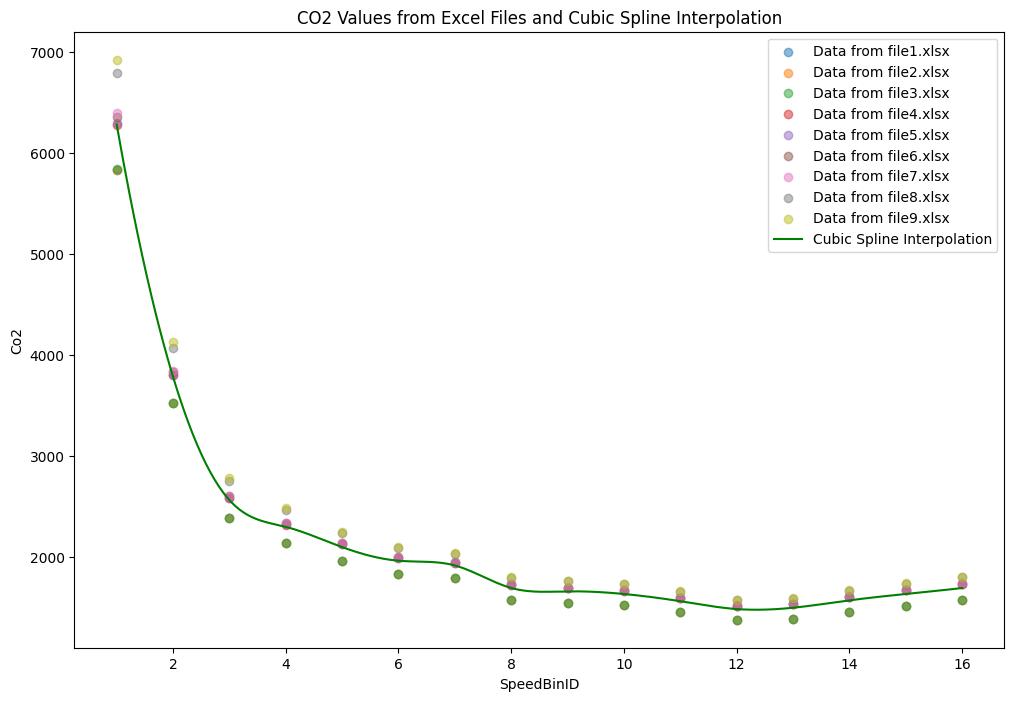

 SpeedBinID  Predicted Co2
          1    6278.944655
          2    3782.826264
          3    2563.001297
          4    2298.526414
          5    2098.299416
          6    1963.520259
          7    1916.733134
          8    1693.950437
          9    1660.493575
         10    1634.471866
         11    1563.063231
         12    1485.536248
         13    1498.491390
         14    1571.709400
         15    1634.465603
         16    1693.787935


In [15]:
#working well [speed defined in code like others, externally]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline

# Assuming you have the list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
combined_df = pd.DataFrame()

# Read datasets from Excel files, assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    #print(f"Columns in {file_path}: {df.columns}")
    combined_df = pd.concat([combined_df, df], ignore_index=True)

# Print columns in the combined DataFrame
#print(f"Columns in combined DataFrame: {combined_df.columns}")

# Group by speed and average the Co2 rates
try:
    grouped = combined_df.groupby('SpeedBinID')['Co2'].mean().reset_index()
except KeyError as e:
    print(f"KeyError: {e}. Please update the column names in the groupby statement.")
    # If an error occurs, set grouped to an empty DataFrame
    grouped = pd.DataFrame(columns=['SpeedBinID', 'Co2'])

# Check if there are enough unique speed values for cubic spline interpolation
if len(grouped['SpeedBinID'].unique()) >= 2:
    # Now `grouped['SpeedBinID']` is your sorted_speed, and `grouped['Co2']` is your sorted_rates
    sorted_speed = grouped['SpeedBinID'].values
    sorted_rates = grouped['Co2'].values

    # Fit the cubic spline
    cs = CubicSpline(sorted_speed, sorted_rates)

    # Generate a smooth curve by predicting at many points within the range
    x_new = np.linspace(sorted_speed.min(), sorted_speed.max(), 400)
    y_new = cs(x_new)

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Plot all values from Excel files
    for file_path in file_paths:
        df = pd.read_excel(file_path)
        plt.scatter(df['SpeedBinID'], df['Co2'], alpha=0.5, label=f'Data from {file_path}')

    # Plot cubic spline interpolation
    plt.plot(x_new, y_new, color='green', label='Cubic Spline Interpolation')
    plt.title('CO2 Values from Excel Files and Cubic Spline Interpolation')
    plt.xlabel('SpeedBinID')
    plt.ylabel('Co2')
    plt.legend()
    plt.show()

    # Create a DataFrame with the predicted CO2 values using cubic spline for the new speed points
    predicted_co2_spline = pd.DataFrame({
        'SpeedBinID': x_new,
        'Predicted Co2 (Cubic Spline)': y_new
    })

    # Print predicted values for the 16 marked speeds
    marked_speeds = np.arange(1, 17)
    predicted_values = cs(marked_speeds)

    print(pd.DataFrame({'SpeedBinID': marked_speeds, 'Predicted Co2': predicted_values}).to_string(index=False))
else:
    print("Not enough unique speed values for cubic spline interpolation.")


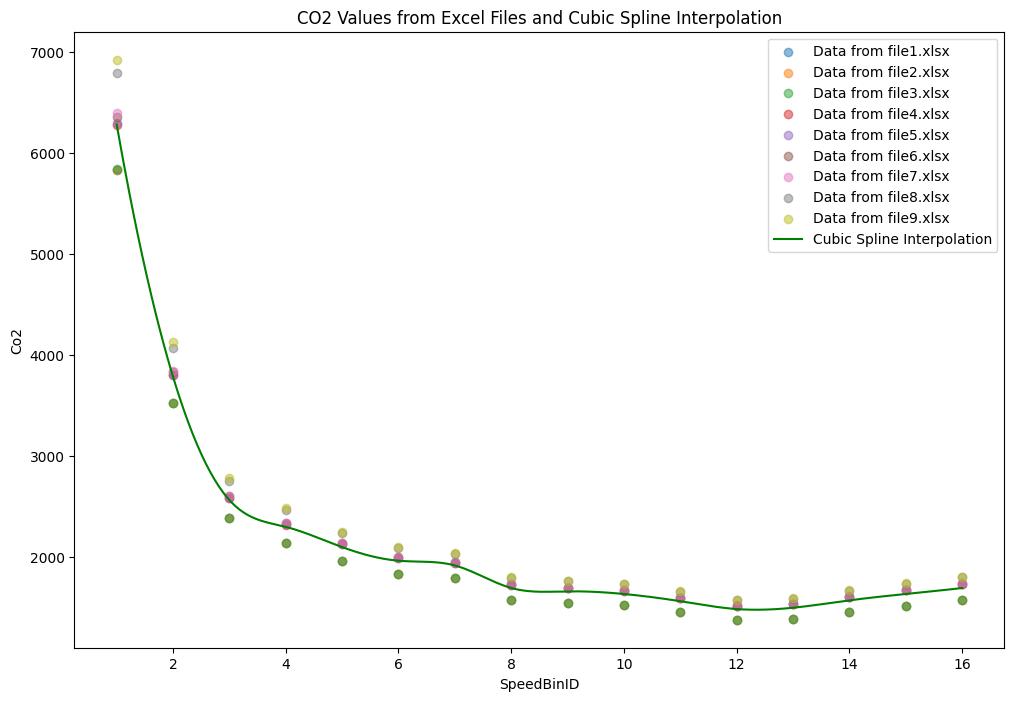

 SpeedBinID  Predicted Co2
          1    6278.944655
          2    3782.826264
          3    2563.001297
          4    2298.526414
          5    2098.299416
          6    1963.520259
          7    1916.733134
          8    1693.950437
          9    1660.493575
         10    1634.471866
         11    1563.063231
         12    1485.536248
         13    1498.491390
         14    1571.709400
         15    1634.465603
         16    1693.787935


In [16]:
#working well [speed defined in code unlike others, speed took from data files. during printing predicted value, defined speed]

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.interpolate import CubicSpline

# Define the data for all datasets
num_speed_points = 16
speed = np.array([i for i in range(1, num_speed_points + 1)]).reshape(-1, 1)

# Assuming you have the list of Excel file paths
file_paths = [f"file{i}.xlsx" for i in range(1, 10)]
datasets = []

# Read datasets from Excel files, assuming 'Co2' column for rates
for file_path in file_paths:
    df = pd.read_excel(file_path)
    datasets.append(df[['SpeedBinID', 'Co2']])

# Combine data from all datasets
combined_df = pd.concat(datasets, ignore_index=True)

# Print columns in the combined DataFrame
#print(f"Columns in combined DataFrame: {combined_df.columns}")

# Group by speed and average the Co2 rates
try:
    grouped = combined_df.groupby('SpeedBinID')['Co2'].mean().reset_index()
except KeyError as e:
    print(f"KeyError: {e}. Please update the column names in the groupby statement.")
    # If an error occurs, set grouped to an empty DataFrame
    grouped = pd.DataFrame(columns=['SpeedBinID', 'Co2'])

# Check if there are enough unique speed values for cubic spline interpolation
if len(grouped['SpeedBinID'].unique()) >= 2:
    # Now `grouped['SpeedBinID']` is your sorted_speed, and `grouped['Co2']` is your sorted_rates
    sorted_speed = grouped['SpeedBinID'].values
    sorted_rates = grouped['Co2'].values

    # Fit the cubic spline
    cs = CubicSpline(sorted_speed, sorted_rates)

    # Generate a smooth curve by predicting at many points within the range
    x_new = np.linspace(sorted_speed.min(), sorted_speed.max(), 400)
    y_new = cs(x_new)

    # Plot the results
    plt.figure(figsize=(12, 8))

    # Plot all values from Excel files
    for file_path in file_paths:
        df = pd.read_excel(file_path)
        plt.scatter(df['SpeedBinID'], df['Co2'], alpha=0.5, label=f'Data from {file_path}')

    # Plot cubic spline interpolation
    plt.plot(x_new, cs(x_new), color='green', label='Cubic Spline Interpolation')
    plt.title('CO2 Values from Excel Files and Cubic Spline Interpolation')
    plt.xlabel('SpeedBinID')
    plt.ylabel('Co2')
    plt.legend()
    plt.show()

    # Create a DataFrame with the predicted CO2 values using cubic spline for the new speed points
    predicted_co2_spline = pd.DataFrame({
        'SpeedBinID': speed.flatten(),
        'Predicted Co2 (Cubic Spline)': cs(speed).flatten()
    })

    # Print predicted values for the 16 marked speeds
    marked_speeds = np.arange(1, num_speed_points + 1)
    predicted_values = cs(marked_speeds)

    print(pd.DataFrame({'SpeedBinID': marked_speeds, 'Predicted Co2': predicted_values}).to_string(index=False))
else:
    print("Not enough unique speed values for cubic spline interpolation.")
